In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Case Study-1/Exoplanet Data - NSSC'20 CS1.csv",header=0)
df.head(15)

,target_name,target_class,detection_type,mass(Jupiter mass),radius(Earth radius),period(Earth years),semi_major_axis(AU),eccentricity,periastron(AU),inclination(Degree),discovered,angular_distance(arc radian),star_name,star_distance(AU),mag,star_mass(Solar Mass),star_radius(Solar Radius),star_teff(K),star_lum(Solar Luminosity),ra(Degree),dec(Degree)
0,11 Com b,exoplanet,Radial Velocity,2.31000,0.8400,326.030000,1.290000,0.2310,94.80,NaN,2008,0.011664,11 Com,110.60,4.74,2.700,19.000,4742,161.3000,185.17920,17.792780
1,11 UMi b,exoplanet,Radial Velocity,34.50000,2.9400,516.220000,1.540000,0.0800,117.63,NaN,2009,0.012887,11 UMi,119.50,5.02,1.800,24.080,4340,181.7900,229.27500,71.823890
2,14 Her b,exoplanet,Radial Velocity,3.22000,4.8000,1773.400000,2.770000,0.3690,22.60,NaN,2002,0.153039,14 Her,18.10,6.67,0.900,0.708,5311,0.3500,242.59580,43.821670
3,2M 2140+16 b,exoplanet,Imaging,20.02000,0.9200,7340.000000,3.530000,0.2600,223.00,46.20,2010,0.141200,2M 2140+16,25.00,NaN,0.080,0.300,2300,0.0022,325.12080,16.421670
4,51 Peg b,exoplanet,Radial Velocity,0.47000,1.9000,4.230800,0.052000,0.0069,54.10,80.00,1995,0.003537,51 Peg,14.70,5.49,1.110,1.266,5793,1.6000,344.36250,20.768610
5,55 Cnc e,exoplanet,Primary Transit,0.02703,0.1737,0.736548,0.015439,0.0280,170.00,90.36,2004,0.001264,55 Cnc,12.34,5.95,1.015,0.980,5196,0.6200,133.15420,28.333890
6,tau Boo A b,exoplanet,Radial Velocity,5.84000,1.0600,3.312490,0.046000,0.0787,218.40,45.00,1996,0.002949,tau Boo A,15.60,4.50,1.300,1.331,6309,2.4800,206.82080,17.456110
7,CoRoT-10 b,exoplanet,Primary Transit,2.75000,0.9700,13.240600,0.105500,0.5300,218.90,88.55,2010,0.000306,CoRoT-10,345.00,15.22,0.890,0.790,5075,0.3700,291.06250,0.746111
8,CoRoT-12 b,exoplanet,Primary Transit,0.91700,1.4400,2.828042,0.040160,0.0700,105.00,85.48,2010,0.000035,CoRoT-12,1150.00,15.52,1.078,1.116,5675,1.1400,100.76670,-1.296390
9,CoRoT-16 b,exoplanet,Primary Transit,0.53500,1.1700,5.352270,0.061800,0.3300,168.41,85.01,2010,0.000074,CoRoT-16,840.00,15.64,1.098,1.190,5650,1.2800,278.52500,-6.002500


In [ ]:
#Q(b)(a)
print(df['detection_type'].value_counts())

Primary Transit    12
Radial Velocity     7
Imaging             1
Name: detection_type, dtype: int64


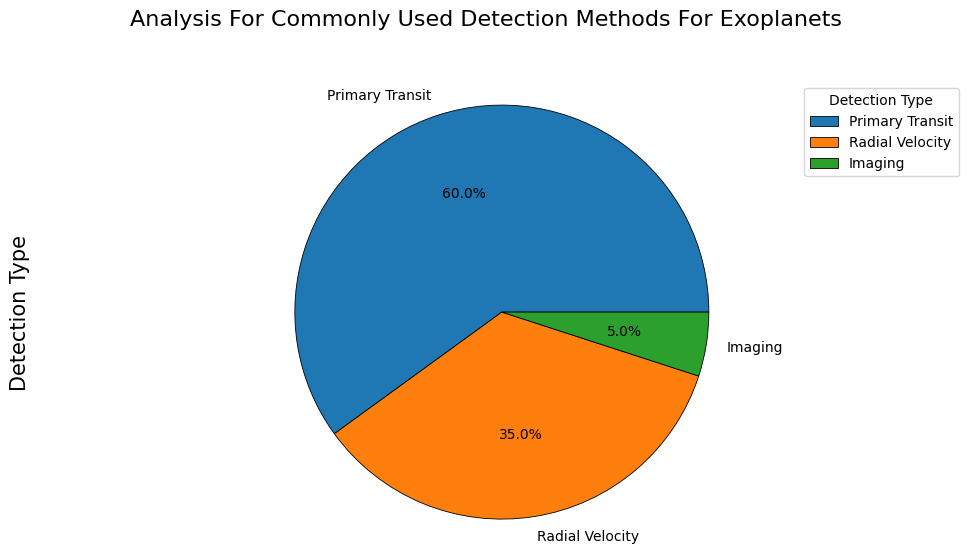

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.style.use('default')

d=df['detection_type'].value_counts() #This function return a Series containing counts of unique values.
d.plot.pie(figsize=(12, 6),autopct='%1.1f%%',wedgeprops={"edgecolor":"black",'linewidth': 0.6}) #To Plot Pie Chart
plt.legend(title='Detection Type',loc="best")
plt.ylabel('Detection Type',fontsize=15)
plt.axis("equal")
plt.suptitle('Analysis For Commonly Used Detection Methods For Exoplanets', size=16, y=1); 
plt.show()
plt.savefig('fig1.jpeg',dpi=900)

20


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


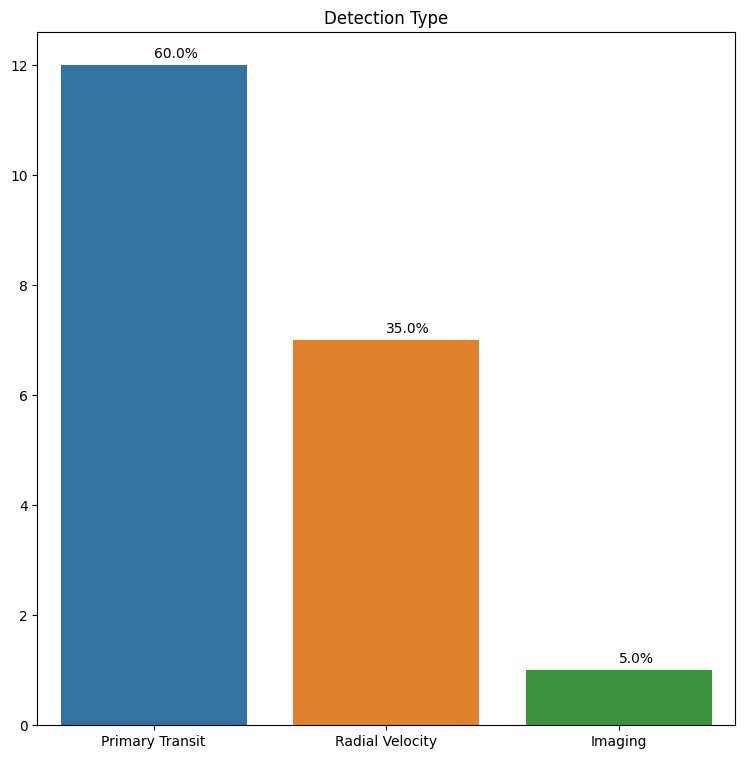

In [ ]:
plt.figure(figsize=(9,9))
total=0
labels = df['detection_type'].value_counts().index.tolist()
sizes = df['detection_type'].value_counts().values.tolist()
for s in sizes:
  total += s
print(total)

sns.barplot(labels, sizes)  # Using Barplot
plt.xticks(rotation=0)
loc , Labels = plt.xticks()

for x1,y1 in zip(loc, sizes):
    a=(int(y1)/total)*100
    label = "{:}%".format(a)
    plt.annotate(label,(x1,y1), textcoords="offset points",xytext=(0,5),ha='left')
plt.title('Detection Type',fontsize=12)
plt.show()

In [ ]:
#Groupby 'detection_type' and return the mean of only particular column in the group.
print(df.groupby('detection_type')['mass(Jupiter mass)'].mean())
print("\n------------------------\n",df.groupby('detection_type')['radius(Earth radius)'].mean())
print("\n------------------------\n",df.groupby('detection_type')['period(Earth years)'].mean())
print("\n------------------------\n",df.groupby('detection_type')['star_mass(Solar Mass)'].mean())

detection_type
Imaging            20.020000
Primary Transit     0.834902
Radial Velocity     7.907143
Name: mass(Jupiter mass), dtype: float64

------------------------
 detection_type
Imaging            0.920000
Primary Transit    0.853392
Radial Velocity    1.975000
Name: radius(Earth radius), dtype: float64

------------------------
 detection_type
Imaging            7340.000000
Primary Transit       9.328287
Radial Velocity     529.288324
Name: period(Earth years), dtype: float64

------------------------
 detection_type
Imaging            0.080000
Primary Transit    0.987083
Radial Velocity    1.452857
Name: star_mass(Solar Mass), dtype: float64


In [ ]:
#Groupby "detection_type" and  return the mean of the remaining columns in each group.
df.groupby('detection_type').mean()

,mass(Jupiter mass),radius(Earth radius),period(Earth years),semi_major_axis(AU),eccentricity,periastron(AU),inclination(Degree),discovered,angular_distance(arc radian),star_distance(AU),mag,star_mass(Solar Mass),star_radius(Solar Radius),star_teff(K),star_lum(Solar Luminosity),ra(Degree),dec(Degree)
detection_type,,,,,,,,,,,,,,,,,
Imaging,20.020000,0.920000,7340.000000,3.530000,0.260000,223.000000,46.200000,2010.000000,0.141200,25.000000,NaN,0.080000,0.300000,2300.000000,0.002200,325.120800,16.421670
Primary Transit,0.834902,0.853392,9.328287,0.079355,0.228608,174.876667,87.329167,2009.250000,0.001180,234.495417,10.248333,0.987083,1.139250,5308.916667,1.316667,198.808889,17.595954
Radial Velocity,7.907143,1.975000,529.288324,1.129831,0.169414,110.861429,70.687500,2002.142857,0.035886,57.094286,5.822857,1.452857,7.103571,5385.000000,50.341429,205.424886,35.067791


In [ ]:
exo_1=df.loc[df.target_name=="HD 10697 b"]
print("Host Star =",exo_1.at[12,"star_name"])
print("--------------------------------------")
exo_1

Host Star = HD 10697
--------------------------------------


,target_name,target_class,detection_type,mass(Jupiter mass),radius(Earth radius),period(Earth years),semi_major_axis(AU),eccentricity,periastron(AU),inclination(Degree),discovered,angular_distance(arc radian),star_name,star_distance(AU),mag,star_mass(Solar Mass),star_radius(Solar Radius),star_teff(K),star_lum(Solar Luminosity),ra(Degree),dec(Degree)
12,HD 10697 b,exoplanet,Radial Velocity,6.837,1.152,1075.69,2.14,0.1043,114.9,69.0,2000,0.066339,HD 10697,32.56,6.29,1.13,1.79,5600,2.78,26.2326,20.08315


In [ ]:
#Q(a)(d)
m1=exo_1.at[12,"mass(Jupiter mass)"] # Mass of the exoplanet
m2=exo_1.at[12,"star_mass(Solar Mass)"] # Mass of the star
M=m1+m2

a=exo_1.at[12,"semi_major_axis(AU)"]
e=exo_1.at[12,"eccentricity"]
v=exo_1.at[12,"inclination(Degree)"]

#thetha = 69.0 degrees = 1.20428 radians
r1_1=a*(1-pow(e,2))/(1+e*math.cos(1.20428))
print("r (distance between host star and exoplanet for given θ)= ",r1_1)

rmin=a*(1-pow(e,2))/(1+e)
rmax=a*(1-pow(e,2))/(1-e)
print("r_min (min distance between host star and exoplanet)= ",rmin)
print("r_max (max distance between host star and exoplanet)= ",rmax)

velmin=math.sqrt(M*((2/rmax)-(1/a)))
print("v_min= ",velmin)
velmax=math.sqrt(M*((2/rmin)-(1/a)))
print("v_max= ",velmax)


r (distance between host star and exoplanet for given θ)=  2.040452993661945
r_min (min distance between host star and exoplanet)=  1.9167980000000002
r_max (max distance between host star and exoplanet)=  2.3632020000000007
v_min=  1.7377138914903185
v_max=  2.142410908086144


In [ ]:
a=df["semi_major_axis(AU)"]
e=df["eccentricity"]
v=df["inclination(Degree)"]

rmin=pd.DataFrame(a*(1-pow(e,2))/(1+e),columns=['r_min'])
rmax=pd.DataFrame(a*(1-pow(e,2))/(1-e),columns=['r_max'])

r_=pd.merge(rmin,rmax,left_index=True, right_index=True)
r_all=pd.merge(df['target_name'],r_,left_index=True, right_index=True)
print(r_all)

     target_name     r_min     r_max
0       11 Com b  0.992010  1.587990
1       11 UMi b  1.416800  1.663200
2       14 Her b  1.747870  3.792130
3   2M 2140+16 b  2.612200  4.447800
4       51 Peg b  0.051641  0.052359
5       55 Cnc e  0.015007  0.015871
6    tau Boo A b  0.042380  0.049620
7     CoRoT-10 b  0.049585  0.161415
8     CoRoT-12 b  0.037349  0.042971
9     CoRoT-16 b  0.041406  0.082194
10      GJ 436 b  0.023350  0.034390
11    HAT-P-11 b  0.038955  0.067045
12    HD 10697 b  1.916798  2.363202
13   HD 118203 b  0.048441  0.093199
14    HD 17156 b  0.052455  0.272145
15   HD 189733 b  0.031291  0.031549
16   HD 209458 b  0.047081  0.047859
17   HD 221416 b  0.108678  0.136922
18   HD 286123 b  0.077168  0.130832
19     HD 3167 c  0.131573  0.227426


In [ ]:
#Q(d)(c)
L=df['star_lum(Solar Luminosity)']
R_max=pd.DataFrame(pow(L/(4*3.1415*0.01),1/2))
R_min=pd.DataFrame(pow(L/(4*3.1415*0.32),1/2))
R_=pd.merge(R_min,R_max,left_index=True, right_index=True)
R_.columns = ["R_min","R_max"]

# Determine which of the exoplanets in the given dataset fall into the habitable zone:-
df2=pd.merge(r_all,R_,left_index=True, right_index=True)
new = df2[((df2.r_min > df2.R_min) & (df2.r_min < df2.R_max)) | ((df2.r_max > df2.R_min) & (df2.r_max < df2.R_max))]
new

,target_name,r_min,r_max,R_min,R_max
12,HD 10697 b,1.916798,2.363202,0.831474,4.703529
